In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # a better visualitation lib

In [2]:
# Import dataset
# Extract phase
# smokers and none smokers file with info about age, children, sex, region and weight data (groups)
#path ='dataset/'
path = 'input/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()
# Transform or Conform phase
# Load phase


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


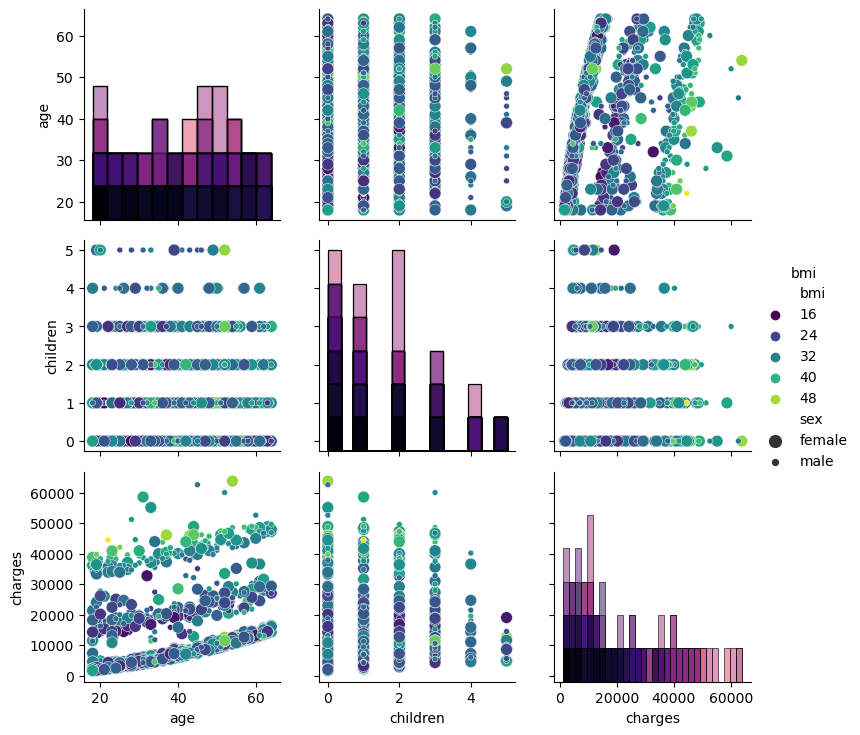

In [29]:
# https://seaborn.pydata.org/tutorial/axis_grids.html
# show data correlated among dimensions and in diag we have a histogram of dimension
g = sns.PairGrid(df, hue="bmi")
g.map_diag(sns.histplot, palette='magma')
g.map_offdiag(sns.scatterplot, size=df['sex'], palette='viridis')
g.add_legend()
# Seems that is corralated with different columns

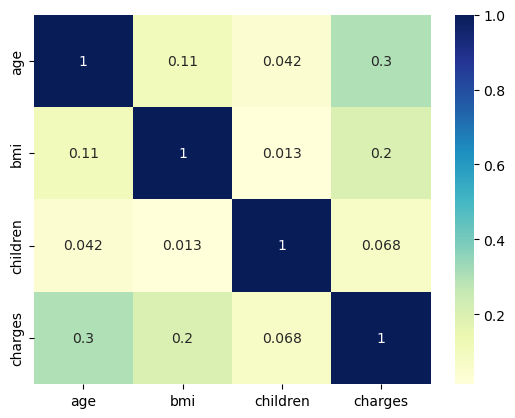

In [14]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# by analysing correlation between pairs of dimensions we can see what is candidate to have it as constant in model
# but we find weak correlation coeficients (less than 0.5)
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True, cmap="YlGnBu")
plt.show()

In [31]:
# execute statistic analysis and generate model
import statsmodels.api as sm
import statsmodels.formula.api as smf
est = smf.ols(formula='age~bmi+charges', data=df)
res = est.fit()
print(res.summary())
# P values 0.000, 0.051, 0.000 seem high
# std error is high so that's why we have issues

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     67.64
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           1.05e-28
Time:                        05:02:44   Log-Likelihood:                -5369.3
No. Observations:                1338   AIC:                         1.074e+04
Df Residuals:                    1335   BIC:                         1.076e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0877      1.879     16.546      0.0

In [11]:
print(res.params)

Intercept    31.087718
bmi           0.119834
charges       0.000335
dtype: float64


In [33]:
# as a result it's better to convert all categoric into numeric dimensions
# execute statistic analysis and generate model
import statsmodels.api as sm
import statsmodels.formula.api as smf
est = smf.ols(formula='age~C(sex)+C(smoker)+bmi+charges', data=df)
res = est.fit()
print(res.summary())
# p-values 0.000, 0.553, 0.000, 0.016 and 0.000 seem high
# std error 1.716 is high 

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     124.0
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           4.70e-90
Time:                        05:04:11   Log-Likelihood:                -5222.2
No. Observations:                1338   AIC:                         1.045e+04
Df Residuals:                    1333   BIC:                         1.048e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.2933      1.716  